<h1>Assignment 3</h1>
<br>
<p>In this assignment, we will build a recommendation model (using Amazon customer review dataset) to predict the rating a user will give to a movie</p>

<h4>Importing the necessary libraries</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv("Amazon - Movies and TV Ratings.csv")

<h4>Analysing the dataset</h4>

In [3]:
dataset

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,A1IMQ9WMFYKWH5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4844,A1KLIKPUF5E88I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4845,A5HG6WFZLO10D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4846,A3UU690TWXCG1X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [4]:
#Utility function to find the number of ratings for each movie
def movieRatings(dataset):
    movieRatingFrequency = {}
    for i in dataset.columns:
        if i != "user_id":
            Nan = dataset[i].isnull().sum()
            ratings = 4848 - Nan
            movieRatingFrequency[i] = ratings
    return movieRatingFrequency

<p>Converting the dictionary of number of ratings for each movie into a pandas Dataframe and printing it</p>

In [5]:
movieRatingFrequency = movieRatings(dataset)
M = []
NR = []
for i in movieRatingFrequency:
    M.append(i)
    NR.append(movieRatingFrequency[i])
Dict = {"Movies"  : M, "Number of Ratings" : NR}
movieRatingDataset = pd.DataFrame.from_dict(Dict)
movieRatingDataset.tail()

,Movies,Number of Ratings
201,Movie202,6
202,Movie203,1
203,Movie204,8
204,Movie205,35
205,Movie206,13


<p><strong>Plotting the number of reviews for each movie</strong></p>

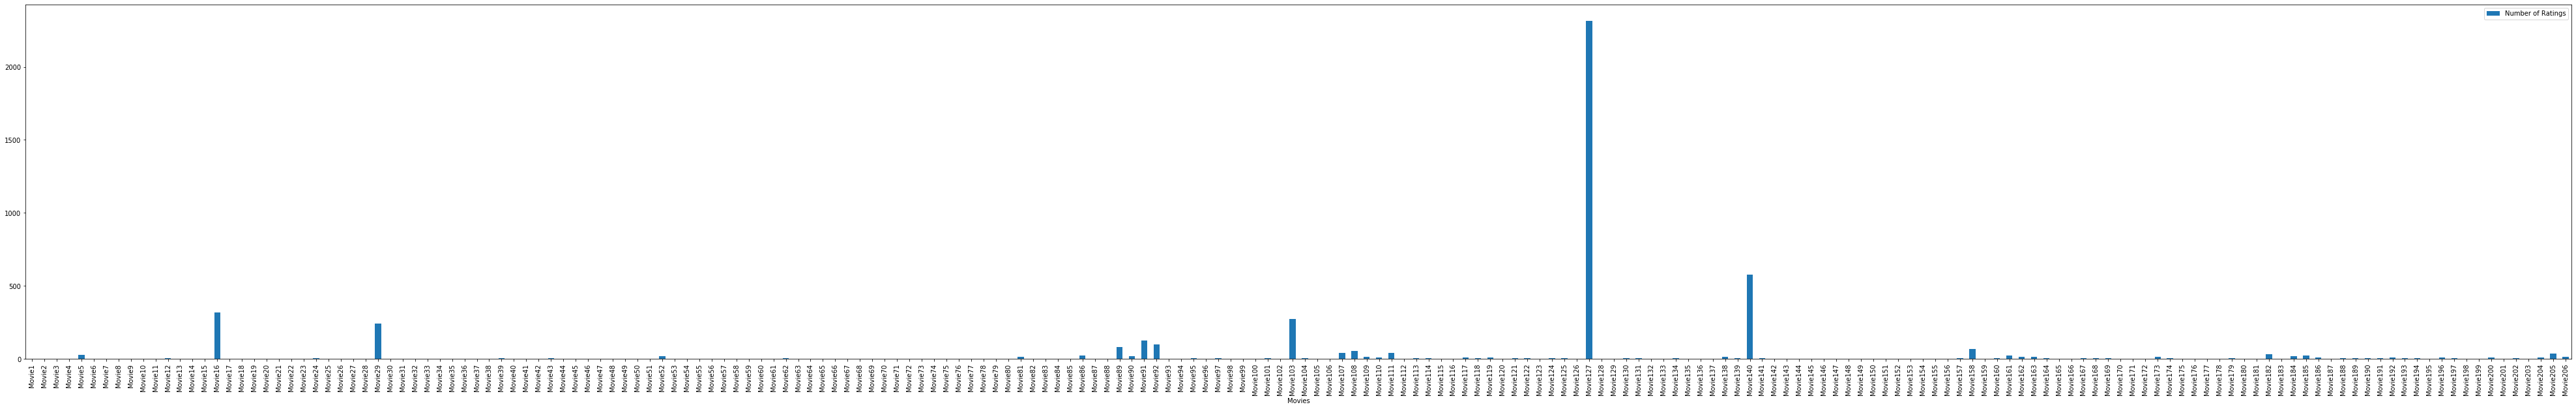

In [6]:
movieRatingDataset.plot.bar(x = "Movies", y = "Number of Ratings", figsize = (70,10))

<p>We can see that the dataset is quite sparsely populated</p>

<h3>[1] Movie with maximum views/ratings</h3>

In [7]:
print("Movie with most ratings is : " + list(movieRatingDataset[movieRatingDataset["Number of Ratings"] == max(movieRatingDataset["Number of Ratings"])]["Movies"])[0])
print("Number of ratings : " + str(list(movieRatingDataset[movieRatingDataset["Number of Ratings"] == max(movieRatingDataset["Number of Ratings"])]["Number of Ratings"])[0]))

Movie with most ratings is : Movie127
Number of ratings : 2313


<h4>We can see that Movie127 has maximum views/ratings with total number of ratings = 2313</h4>

<br>
<h3>[2] Average ratings of the movies</h3>

In [8]:
#Utility function that calculates the mean rating for each movie
def findAverageRatings(dataset):
    movie = []
    avg_ratings = []
    for i in dataset.columns:
        if i == "user_id":
            continue
        sum_ratings = dataset[i].sum()
        total_ratings = 4848 - dataset[i].isnull().sum()
        avg_rating = sum_ratings / total_ratings
        movie.append(i)
        avg_ratings.append(avg_rating)
    Dict = {"Movies" : movie, "Average Ratings" : avg_ratings}
    return Dict

In [9]:
Dict = findAverageRatings(dataset)
avgRatings = pd.DataFrame.from_dict(Dict)

<p><strong>Plotting the mean ratings for each movie</strong></p>
<p>we can see the average ratings for most of the movies is around 4-5</p>

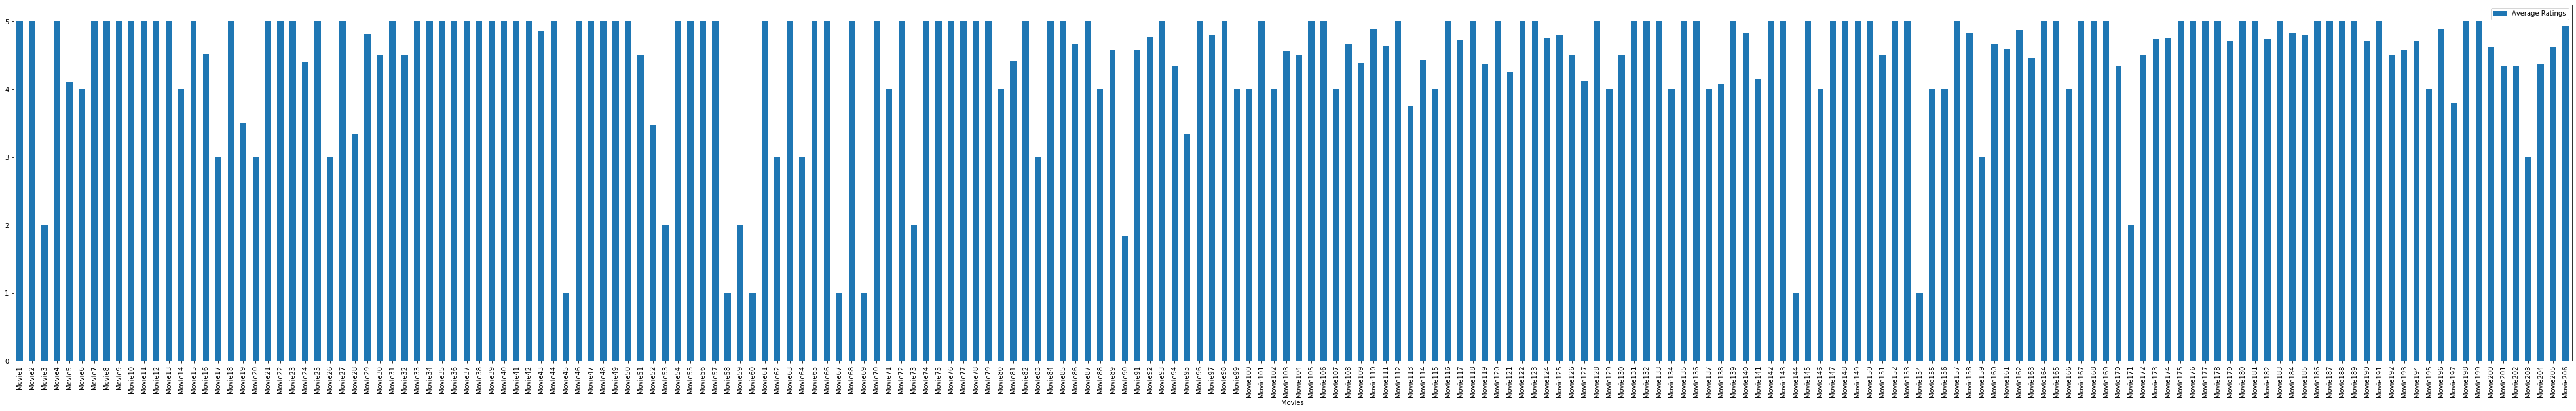

In [10]:
avgRatings.plot.bar(x = "Movies", y = "Average Ratings", figsize = (70,10))

<h4>The average rating for all the movies is stored in the pandas Dataframe avgRatings</h4>

In [11]:
avgRatings

,Movies,Average Ratings
0,Movie1,5.000000
1,Movie2,5.000000
2,Movie3,2.000000
3,Movie4,5.000000
4,Movie5,4.103448
...,...,...
201,Movie202,4.333333
202,Movie203,3.000000
203,Movie204,4.375000
204,Movie205,4.628571


<h3>5 movies with maximum ratings</h3>

In [12]:
movieRatingDataset.sort_values(by = ["Number of Ratings"], inplace = True, ascending = False)
movieRatingDataset.head(5)

,Movies,Number of Ratings
126,Movie127,2313
139,Movie140,578
15,Movie16,320
102,Movie103,272
28,Movie29,243


<p><strong>The top 5 movies with maximum ratings are Movie127, Movie140, Movie16, Movie103, Movie29</strong></p>

<h3>[3] Top 5 movies with least audience</h3>

In [13]:
min(movieRatingDataset["Number of Ratings"])

1

In [14]:
leastRatedMovies = movieRatingDataset[movieRatingDataset["Number of Ratings"] == 1]
leastRatedMovies

,Movies,Number of Ratings
32,Movie33,1
164,Movie165,1
198,Movie199,1
6,Movie7,1
20,Movie21,1
...,...,...
53,Movie54,1
115,Movie116,1
114,Movie115,1
54,Movie55,1


<p>Since there are many movies with only 1 rating (which is the least number of rating for any rating), we will define the top 5 movies with  least audience based on their average ratings</p>

In [15]:
leastAudience = {}
for i in leastRatedMovies["Movies"]:
   leastAudience[i] = list(avgRatings[avgRatings["Movies"] == i]["Average Ratings"])[0]
leastAudience = sorted(leastAudience.items(), key = lambda kv:(kv[1], kv[0]))
leastAudience

[('Movie144', 1.0),
 ('Movie154', 1.0),
 ('Movie45', 1.0),
 ('Movie58', 1.0),
 ('Movie60', 1.0),
 ('Movie67', 1.0),
 ('Movie69', 1.0),
 ('Movie171', 2.0),
 ('Movie3', 2.0),
 ('Movie59', 2.0),
 ('Movie73', 2.0),
 ('Movie17', 3.0),
 ('Movie20', 3.0),
 ('Movie203', 3.0),
 ('Movie64', 3.0),
 ('Movie83', 3.0),
 ('Movie100', 4.0),
 ('Movie115', 4.0),
 ('Movie14', 4.0),
 ('Movie146', 4.0),
 ('Movie156', 4.0),
 ('Movie195', 4.0),
 ('Movie6', 4.0),
 ('Movie71', 4.0),
 ('Movie80', 4.0),
 ('Movie88', 4.0),
 ('Movie1', 5.0),
 ('Movie10', 5.0),
 ('Movie106', 5.0),
 ('Movie116', 5.0),
 ('Movie123', 5.0),
 ('Movie13', 5.0),
 ('Movie133', 5.0),
 ('Movie135', 5.0),
 ('Movie142', 5.0),
 ('Movie143', 5.0),
 ('Movie145', 5.0),
 ('Movie147', 5.0),
 ('Movie149', 5.0),
 ('Movie15', 5.0),
 ('Movie152', 5.0),
 ('Movie153', 5.0),
 ('Movie165', 5.0),
 ('Movie175', 5.0),
 ('Movie176', 5.0),
 ('Movie177', 5.0),
 ('Movie178', 5.0),
 ('Movie18', 5.0),
 ('Movie180', 5.0),
 ('Movie183', 5.0),
 ('Movie187', 5.0),
 ('Mo

In [16]:
print("Movies with least ratings are Movie144, Movie154, Movie45, Movie58, Movie60")

Movies with least ratings are Movie144, Movie154, Movie45, Movie58, Movie60


<p><strong>The movies with least ratings are Movie144, Movie154, Movie45, Movie58, Movie60</strong></p>

<p>Filling the NaN with -10, for computational convenience</p>

In [17]:
dataset = dataset.fillna(-10)
dataset

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0
1,AH3QC2PC1VTGP,-10.0,-10.0,2.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0
2,A3LKP6WPMP9UKX,-10.0,-10.0,-10.0,5.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0
3,AVIY68KEPQ5ZD,-10.0,-10.0,-10.0,5.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0
4,A1CV1WROP5KTTW,-10.0,-10.0,-10.0,-10.0,5.0,-10.0,-10.0,-10.0,-10.0,...,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,A1IMQ9WMFYKWH5,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,5.0
4844,A1KLIKPUF5E88I,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,5.0
4845,A5HG6WFZLO10D,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,5.0
4846,A3UU690TWXCG1X,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,5.0


<h4>Changing the form of the dataframe for making it easier to use in prediction mode. Also since the user id is a string, we map the user id with a unique  integer number for using it in the predictions.</h4>

In [18]:
d = {"uid" : [], "iid" : [], "rating" : []}
userMappings = {}
for i in range (4848):
    c = 0
    for j in dataset.iloc[i]:
        if type(j) == str:
            userMappings[j] = i+1
        else:
            if j!= -10:
                d["uid"].append(i+1)
                d["iid"].append(c)
                d["rating"].append(j)
        c += 1     

<p>First 20 user ID mappings</p>

In [19]:
df = pd.DataFrame.from_dict(d)
c = 1
for i in userMappings:
    print(i + " : " +str(userMappings[i]))
    c += 1
    if c> 20:
        break

A3R5OBKS7OM2IR : 1
AH3QC2PC1VTGP : 2
A3LKP6WPMP9UKX : 3
AVIY68KEPQ5ZD : 4
A1CV1WROP5KTTW : 5
AP57WZ2X4G0AA : 6
A3NMBJ2LCRCATT : 7
A5Y15SAOMX6XA : 8
A3P671HJ32TCSF : 9
A3VCKTRD24BG7K : 10
ANF0AGIV0JCH2 : 11
A3LDEBLV6MVUBE : 12
A1R2XZWQ6NM5M1 : 13
A36L1XGA5AQIJY : 14
A2HWI21H23GDS4 : 15
A1DNYFL3RSXRMO : 16
A39VF226GBM1JH : 17
ASB0E2O2FLNA7 : 18
A19E15Y9V09CVJ : 19
A3K979KQ7K0S5K : 20


<p>The new dataframe</p>

In [20]:
df

,uid,iid,rating
0,1,1,5.0
1,1,2,5.0
2,2,3,2.0
3,3,4,5.0
4,4,4,5.0
...,...,...,...
4995,4844,206,5.0
4996,4845,206,5.0
4997,4846,206,5.0
4998,4847,206,5.0


In [21]:
lowestRating = df["rating"].min()
highestRating = df["rating"].max()
print("Reviews range from : {0} to {1}".format(lowestRating, highestRating))

Reviews range from : 1.0 to 5.0


<h5>We will be using the surprise library provided in python to build the recommendation modek<h5>

<p>Uncomment the below cell to donwload the surprise library</p>

In [22]:
#!pip install surprise

In [23]:
import surprise
from surprise.model_selection import train_test_split

In [24]:
reader = surprise.Reader(rating_scale = (1, 5))
data = surprise.Dataset.load_from_df(df, reader)

<h3>[4] Dividing the data into train and test set, with test set containing 25% of the data</h3>

In [25]:
train, test = train_test_split(data, test_size = 0.25)

<h3>[5] Building the recommendational model which uses matrix factorisation for making the predictions of movie ratings</h3>

In [26]:
algo = surprise.SVDpp()
output = algo.fit(train)

<h3>[6] Making the predictions on the test dataset</h3>

In [27]:
predictions = algo.test(test)
surprise.accuracy.rmse(predictions)

RMSE: 1.1324


1.1323983036888778

<p>We can observe that Root mean squared error for the above model is about 1.13<p>

<p><strong>For example, let's see the rating that user with user_id = AHY53YW4CJYFN gives to movie Movie120 </strong></p>

In [28]:
uniqueUserID = userMappings["AHY53YW4CJYFN"]

In [29]:
pred = algo.predict(uid = uniqueUserID, iid = 120)
score = pred.est
print(score)

4.581167220721535


<p>The model predicts that user AHY53YW4CJYFN will give a rating of <strong>4.6</strong> to Movie120</p>